In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets


# carrega a base de dados
iris = datasets.load_iris()
# insere os dados em um dataframe, apenas para ajudar na visualização
df = pd.DataFrame(iris.data,columns = iris.feature_names)
# adiciona a target ao dataframe
df['target'] = iris.target

# trocando as targets de numeros para o nome da classe, deste modo as questões ficarão mais claras
remap = {0 : 'setosa',
         1 : 'versicolor',
         2 : 'virginica'}

df.target = df.target.map(remap)

X_train, X_test, y_train, y_test = train_test_split(df.drop('target',axis=1),
                                                    df.target,
                                                    stratify = df.target,
                                                    test_size=0.20,
                                                    random_state=42)

In [4]:
setosa_df = X_train.copy()

setosa_df['target'] = y_train.map({'setosa' : 1, 'versicolor' : 0, 'virginica' : 0})

setosa = len(setosa_df[setosa_df['target'] == 1])

setosa

40

In [5]:
# Faz uma cópia do conjunto de treino
df_train_copy = X_train.copy()

# Adiciona uma nova coluna chamada 'target' para classificar 'setosa' como 1 e as demais como 0
df_train_copy['target'] = y_train.map(lambda x: 1 if x == 'setosa' else 0)

# Conta quantos elementos temos da classe 1 (setosa)
num_setosa = df_train_copy['target'].sum()

# Exibe o número de elementos da classe 1
print(f"Número de elementos da classe 1 (setosa): {num_setosa}")


Número de elementos da classe 1 (setosa): 40


In [6]:
setosa = len(setosa_df[setosa_df['target'] == 0])

setosa

80

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

reglog_setosa = LogisticRegression(random_state = 12)

reglog_setosa.fit(X_train, setosa_df['target'])

predicao = reglog_setosa.predict(X_train)

acuracia = accuracy_score(setosa_df['target'], predicao)

acuracia

1.0

In [17]:
virginica_df = X_train.copy()

virginica_df['target'] = y_train.map({'virginica' : 1, 'versicolor' : 0, 'setosa' : 0})

virginica = len(virginica_df[virginica_df['target'] == 1])

reglog_virg = LogisticRegression(random_state = 12)

reglog_virg.fit(X_train, virginica_df['target'])

predicao = reglog_virg.predict(X_train)

acuracia = accuracy_score(virginica_df['target'], predicao)

acuracia

0.975

In [18]:
versicolor_df = X_train.copy()

versicolor_df['target'] = y_train.map({'versicolor' : 1, 'virginica' : 0, 'setosa' : 0})

versicolor = len(versicolor_df[versicolor_df['target'] == 1])

reglog_vers = LogisticRegression(random_state = 12)

reglog_vers.fit(X_train, versicolor_df['target'])

predicao = reglog_vers.predict(X_train)

acuracia = accuracy_score(versicolor_df['target'], predicao)

acuracia

0.725

In [15]:
# onde logistic_setosa é o regressor linear treinado para predizer se uma observação é ou não setosa.
probs_setosa = pd.DataFrame(reglog_setosa.predict_proba(X_test))[1]

print(probs_setosa.mean())

0.3382911736023013


In [19]:
probs_virg = pd.DataFrame(reglog_virg.predict_proba(X_test))[1]

print(probs_virg.mean())

0.33651926522070563


In [20]:
probs_vers = pd.DataFrame(reglog_vers.predict_proba(X_test))[1]

print(probs_vers.mean())

0.3094125326911029


In [27]:
novo_df = pd.DataFrame({'setosa' : probs_setosa, 'versicolor' : probs_vers, 'virginica' : probs_virg})

print(novo_df.head())

     setosa  versicolor  virginica
0  0.984847    0.280461   0.000004
1  0.002145    0.316227   0.576837
2  0.153249    0.643166   0.005542
3  0.136836    0.682044   0.005609
4  0.987026    0.206874   0.000004


In [ ]:
novo_df.idxmax(axis=1)

In [31]:
onevrest = LogisticRegression(random_state=12, multi_class='ovr')

onevrest.fit(X_train, y_train)

acuracia = accuracy_score(y_test, novo_df.idxmax(axis=1))

acuracia

c:\Users\mari_\OneDrive\Documentos\Cientista de Dados\6.Regressão Logística\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


0.9333333333333333

In [32]:
pred = onevrest.predict(X_test)

acuracia = accuracy_score(y_test, pred)

acuracia

0.9333333333333333

In [33]:
np.random.seed(32)

n_samples = 100

x1 = list(np.random.randint(40, 70, int(n_samples/2)))
y1 = [0] * int(n_samples/2)

x2 = list(np.random.randint(63, 110, int(n_samples/2)))
y2 = [1] * int(n_samples/2)

x1.extend(x2)

y1.extend(y2)

x = x1
y = y1

dataset = pd.DataFrame({'peso':x,
                         'diabetes':y})

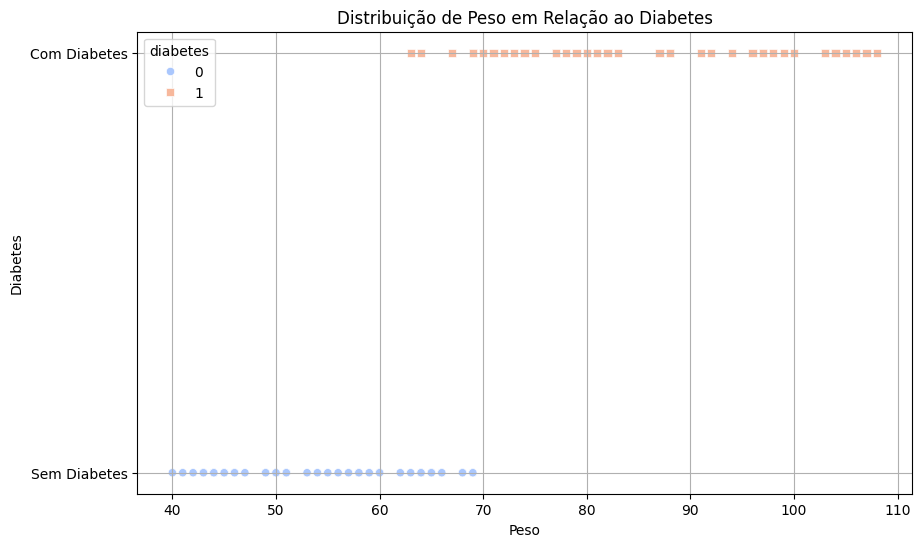

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotando os dados
plt.figure(figsize=(10, 6))
sns.scatterplot(x='peso', y='diabetes', data=dataset, hue='diabetes', palette='coolwarm', style='diabetes', markers=["o", "s"])
plt.title('Distribuição de Peso em Relação ao Diabetes')
plt.xlabel('Peso')
plt.ylabel('Diabetes')
plt.yticks([0, 1], ['Sem Diabetes', 'Com Diabetes'])
plt.grid()
plt.show()

In [37]:
import math
import numpy as np
import matplotlib.pyplot as plt

def plota_logistica(x, y, x0, k, L = 1, limit_x_std = 1.3):
    '''
    Gera uma curva logistica e exibe o resultado em um gráfico contendo a curva logistica e os dados originais do problema
    
    args:
        - x (pandas array): observações
        - y (array): target
        - x0 (int ou float): centro da curva
        - k (int ou float): fator de crescimento
        - L (int ou float): valor máximo da curva
    
    return:
        - None
    '''
    
    x_min = x.min() - (x.std() * limit_x_std)
    x_max = x.max() + (x.std() * limit_x_std)
    
    range_ = np.arange(x_min , x_max, 0.5)
    
    # aplicando a logistica para cada valor de x
    l_range =  [L / (1 + math.e**(-k * (x -x0) )) for x in range_]
    
    
    df_logist = pd.DataFrame({'x':range_,
                              'y_l':l_range
                             })
    
    # colocando tudo em um dataframe só para eu poder ordenar e a curva sair bonitinha no grafico
    df_real = pd.DataFrame({'x':x,
                            'y':y,
                           }).sort_values(by = 'x')
    
    # plotando a logistica
    plt.plot(df_logist.x, df_logist.y_l, linewidth=2, color = 'lightgreen')
    
    # plotando os dados x
    plt.scatter(df_real.x, df_real.y)
    
    # alterando os limites do eixo X do gráfico
    plt.xlim([x_min, x_max])
    
    # adiciona titulo
    plt.title(f'Função Logistica\nParâmetros: x_0 = {x0}, k = {k} e L = {L}')
    
    # exibe o grafico
    plt.show()

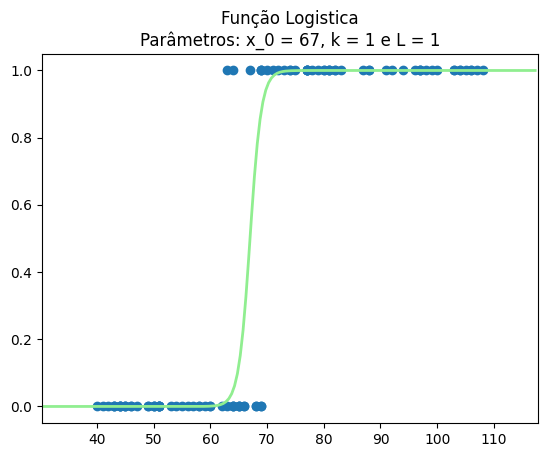

In [38]:
plota_logistica(x = dataset.peso, y = dataset.diabetes,
                x0 = 67, # centro da curva
                k = 1,   # fator de crescimento 
                L = 1,   # valor máximo da curva
                limit_x_std = 0.5) # ajuste do limite do eixo x para visualizar a curva

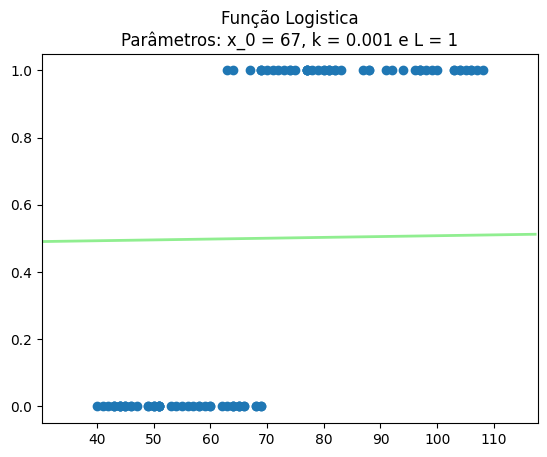

In [40]:
plota_logistica(x = dataset.peso, y = dataset.diabetes,
                x0 = 67, # centro da curva
                k = 0.001,   # fator de crescimento 
                L = 1,   # valor máximo da curva
                limit_x_std = 0.5) # ajuste do limite do eixo x para visualizar a curva

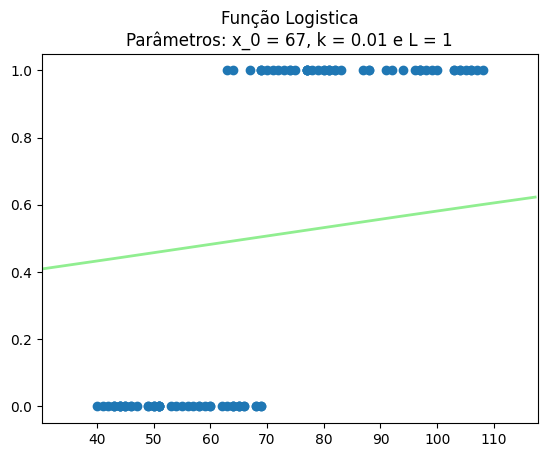

In [41]:
plota_logistica(x = dataset.peso, y = dataset.diabetes,
                x0 = 67, # centro da curva
                k = 0.01,   # fator de crescimento 
                L = 1,   # valor máximo da curva
                limit_x_std = 0.5) # ajuste do limite do eixo x para visualizar a curva

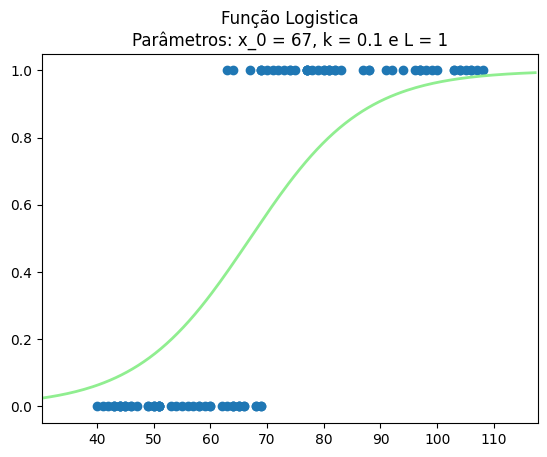

In [42]:
plota_logistica(x = dataset.peso, y = dataset.diabetes,
                x0 = 67, # centro da curva
                k = 0.1,   # fator de crescimento 
                L = 1,   # valor máximo da curva
                limit_x_std = 0.5) # ajuste do limite do eixo x para visualizar a curva

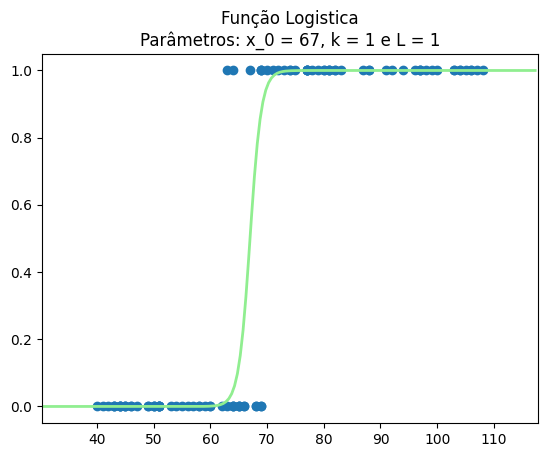

In [43]:
plota_logistica(x = dataset.peso, y = dataset.diabetes,
                x0 = 67, # centro da curva
                k = 1,   # fator de crescimento 
                L = 1,   # valor máximo da curva
                limit_x_std = 0.5) # ajuste do limite do eixo x para visualizar a curva

In [56]:
from sklearn.metrics import log_loss

# Parâmetros da função logística
k = 1
x0 = 67
L = 1

# Função logística
def logistic_function(x):
    return L / (1 + np.exp(-k * (x - x0)))

# Aplicar a função logística a todos os pesos
dataset['predicted_prob'] = logistic_function(dataset['peso'])

# Calcular o Log Loss
loss = log_loss(dataset['diabetes'], dataset['predicted_prob'])

print(f'Log Loss: {loss:.4f}')

Log Loss: 0.1628


In [58]:
print(dataset['predicted_prob'].mean())


0.5141944663091236


In [65]:
inter = LogisticRegression(random_state=12, penalty = None)

x = dataset[['peso']]  # deve ser um DataFrame (2D)
y = dataset['diabetes']  # deve ser uma Série (1D)

inter.fit(x,y)

b = inter.intercept_
b

array([-34.37025299])

In [64]:
a = inter.coef_
a

array([[0.50736242]])

In [95]:
def plota_logistica_linear(x, y, a, b, limit_x_std = 1.3):
    '''
    Gera uma curva logistica e exibe o resultado em um gráfico contendo a curva logistica e os dados originais do problema
    
    args:
        - x (pandas array): observações
        - y (array): target
        - a (int ou float): inclinação da reta logit
        - b (int ou float): intercept da reta logit
    
    return:
        - None
    '''
    
    x_min = x.min() - (x.std() * limit_x_std)
    x_max = x.max() + (x.std() * limit_x_std)
    
    range_ = np.arange(x_min , x_max, 0.5)
    
    # aplicando a logistica para cada valor de x
    
    l_range =  [1 / (1 + math.e**(-1 * (a*x+b) )) for x in range_]
    
    
    df_logist = pd.DataFrame({'x':range_,
                              'y_l':l_range
                             })
    
    # colocando tudo em um dataframe só para eu poder ordenar e a curva sair bonitinha no grafico
    df_real = pd.DataFrame({'x':x,
                            'y':y,
                           }).sort_values(by = 'x')
    
    # plotando a logistica
    plt.plot(df_logist.x, df_logist.y_l, linewidth=2, color = 'lightgreen')
    
    # plotando os dados x
    plt.scatter(df_real.x, df_real.y, color = 'orange')
    
    # alterando os limites do eixo X do gráfico
    plt.xlim([x_min, x_max])
    
    # adiciona titulo
    plt.title(f'Função Logistica\nParâmetros: a = {a}, b = {b}')
    
    # exibe o grafico
    plt.show()

In [82]:
x = dataset['peso']  # deve ser um DataFrame (2D)
y = dataset['diabetes']  # deve ser uma Série (1D)

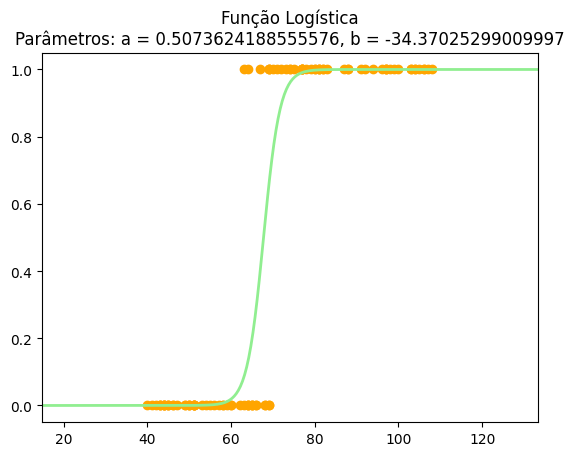

In [83]:
plota_logistica_linear(x, y, a, b, limit_x_std = 1.3)

In [86]:
x = dataset[['peso']]  # deve ser um DataFrame (2D)
y = dataset['diabetes']  # deve ser uma Série (1D)

In [88]:
modelo1 = LogisticRegression(random_state=12, penalty='l2', C = 1.0)

modelo1.fit(x,y)

a1 = modelo1.coef_
b1 = modelo1.intercept_

print(a1, b1)



[[0.49559049]] [-33.57613361]


In [89]:
modelo2 = LogisticRegression(random_state=12, penalty='l2', C = 0.1)

modelo2.fit(x,y)

a2 = modelo2.coef_
b2 = modelo2.intercept_

print(a2, b2)

[[0.42575662]] [-28.86390267]


In [90]:
modelo3 = LogisticRegression(random_state=12, penalty='l1', C = 1, solver ='liblinear')

modelo3.fit(x,y)

a3 = modelo3.coef_
b3 = modelo3.intercept_

print(a3, b3)

[[0.17138675]] [-11.56574981]


c:\Users\mari_\OneDrive\Documentos\Cientista de Dados\6.Regressão Logística\myenv\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [91]:
modelo4 = LogisticRegression(random_state=12, penalty='l1', C = 0.1, solver ='liblinear')

modelo4.fit(x,y)

a4 = modelo4.coef_
b4 = modelo4.intercept_

print(a4, b4)

[[0.00926711]] [-0.23622339]


In [92]:
x = dataset['peso']  # deve ser um DataFrame (2D)
y = dataset['diabetes']  # deve ser uma Série (1D)

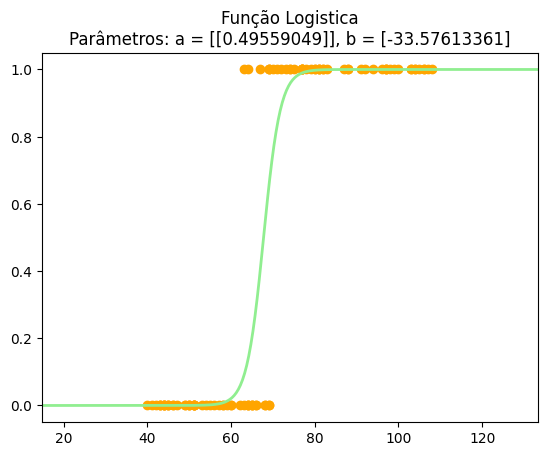

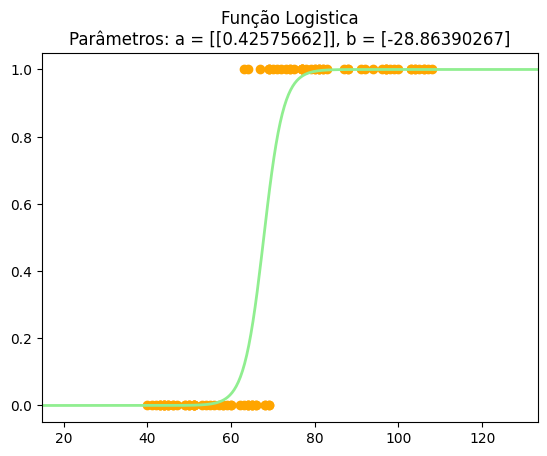

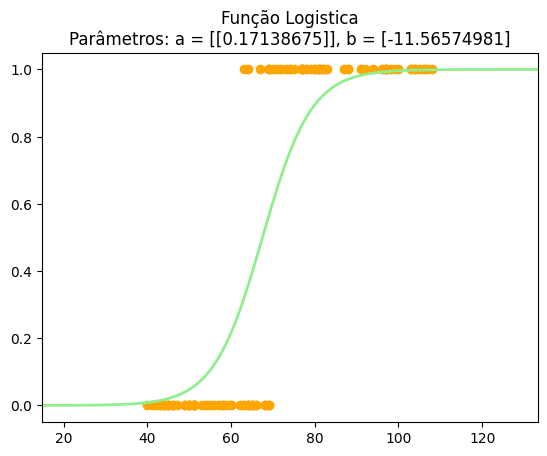

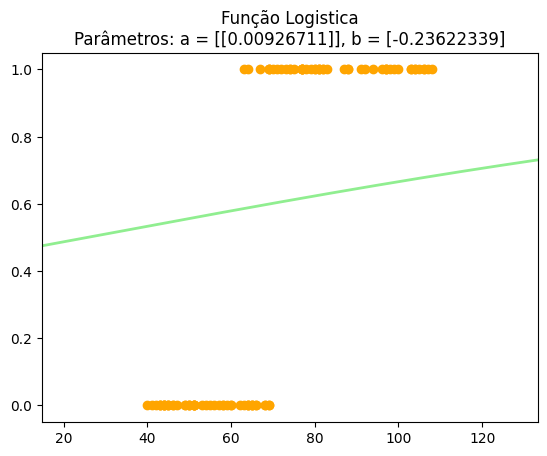

In [97]:
plota_logistica_linear(x, y, a1, b1, limit_x_std = 1.3)
plota_logistica_linear(x, y, a2, b2, limit_x_std = 1.3)
plota_logistica_linear(x, y, a3, b3, limit_x_std = 1.3)
plota_logistica_linear(x, y, a4, b4, limit_x_std = 1.3)

In [98]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

titanic = pd.read_csv('titanic.csv',usecols=['Pclass','Sex','Age','SibSp','Parch','Fare','Survived'])

# codificando sexo
enc = OrdinalEncoder()
titanic[['Sex']] = enc.fit_transform(titanic[['Sex']])

# dropando valores faltantes porque nois tem preguiça de arrumar =]
titanic.dropna(inplace=True)

# Criando uma variável aleatória
titanic['std_tam_dedinho'] = np.random.normal(size = len(titanic))

# separando dados em treino e teste
X = titanic.drop('Survived',axis=1)
y = titanic['Survived']

X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size=0.3,
                                                 random_state=42,
                                                 stratify=y)

In [99]:
modelo_titanic = LogisticRegression(random_state=12,penalty='l2', C = 0.3)

modelo_titanic.fit(X_train, y_train)

pred_titanic = modelo_titanic.predict(X_train)

acuracia_titanic = accuracy_score(y_train, pred_titanic)

acuracia_titanic

c:\Users\mari_\OneDrive\Documentos\Cientista de Dados\6.Regressão Logística\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8076152304609219

In [100]:
pred_titanic2 = modelo_titanic.predict(X_test)

acuracia_titanic2 = accuracy_score(y_test, pred_titanic2)

acuracia_titanic2

0.7953488372093023

In [113]:
print(np.min(np.abs(modelo_titanic.coef_[0])))

print(X.columns[np.argmin(np.abs(modelo_titanic.coef_[0]))])


0.0012392620468873001
std_tam_dedinho


In [108]:
# Obtendo os coeficientes
coeficientes = modelo_titanic.coef_[0]  # Os coeficientes são retornados em formato 2D, pegamos a primeira linha
nomes_variaveis = X.columns  # Os nomes das variáveis

# Encontrando o menor valor de coeficiente em módulo
menor_coeficiente = np.min(np.abs(coeficientes))
indice_menor_coeficiente = np.argmin(np.abs(coeficientes))
variavel_menor_coeficiente = nomes_variaveis[indice_menor_coeficiente]

# Resultados
print(f'Menor valor de coeficiente em módulo: {menor_coeficiente}')
print(f'Variável correspondente: {variavel_menor_coeficiente}')

Menor valor de coeficiente em módulo: 0.0012392620468873001
Variável correspondente: std_tam_dedinho


In [114]:
modelo_titanic3 = LogisticRegression(random_state=12,penalty='l1', C = 0.3, solver ='liblinear')

modelo_titanic3.fit(X_train, y_train)

pred_titanic3 = modelo_titanic3.predict(X_train)

acuracia_titanic3 = accuracy_score(y_train, pred_titanic3)

acuracia_titanic3

0.7955911823647295

In [115]:
pred_titanic3_test = modelo_titanic3.predict(X_test)

acuracia_titanic3_test = accuracy_score(y_test, pred_titanic3_test)

acuracia_titanic3_test

0.7767441860465116

In [118]:
print(np.min(np.abs(modelo_titanic3.coef_[0])))

print(X.columns[np.argmin(np.abs(modelo_titanic3.coef_[0]))])

0.0
std_tam_dedinho
